# CTD Data, Density & Buoyancy Frequency Calculator

Import formatted CTD data from La Perouse/Line P cruises, calculate in situ density, and find buoyancy frequency through depth.

Barkley Canyon centred at approximately Lat 48.33 Long -126.03, so Rosette (deep) CTD casts from Station P4 are closest (approximately Lat 48.39 Long -126.39); a distance of about 27 km.

Winter casts are within January/February, and summer casts are within August/September.

Uses the Seawater Python package for determining ocean characteristics to calculate density, $\rho(z)$, and the Brünt-Väisälä Frequency squared ($N^2$(z)).

## Imports

In [383]:
import xarray as xr
import datetime
from datetime import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import numpy as np
import scipy.signal as sig
import scipy.interpolate as interp
import pandas as pd
import seawater as sea
from scipy.stats import chi2
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

## CTD Data

Line P CTD data obtained from http://www.waterproperties.ca/linep/cruises.php. 

Format the .ctd file as .csv with pressure, temperature, and salinity as the first three columns, with headers.

In [384]:
year = '2019'        # strings for output filenames and titles
season = 'Winter'
CTD = np.genfromtxt(f'/Users/Kurtis/Documents/Python/Data/DFOLineP_P4/CTD/{year}_{season}.csv',\
                    skip_header=1,delimiter=',')

## Density and $N^2$ Calculations

Density of Sea Water using UNESCO 1983 (EOS 80) polynomial.

Calculates potential density, and the Brünt-Väisälä Frequency squared ($N^2$), at the mid-depths (N2P), from the equation:
$N^{2} = \frac{-g}{\sigma_{\theta}} \frac{d\sigma_{\theta}}{dz}$

In [385]:
P = CTD[:,0]    # depth(pressure) [m]([dbar])
T = CTD[:,1]    # temperature [Celsius]
S = CTD[:,2]    # salinity, PSS-78 [PSU]
lat = 48.39     # latitude, degrees North/South
rho = sea.eos80.pden(S,T,P,pr=0)              # calculates potential density of seawater at P = 0
N2,q,N2P = sea.geostrophic.bfrq(S,T,P,lat)    # calculates squared Brunt-Vaisala frequency of seawater at mid-depths
N2_avg = np.nanmean(N2[197:897])              # average N^2 through lower depth (between -200m and -900m)
print('Average N^2, -200 m to -900 m = ',N2_avg,'(rad/s)^2')

Average N^2, -200 m to -900 m =  1.2360437335577383e-05 (rad/s)^2


## Comprehensive Plots

<IPython.core.display.Javascript object>


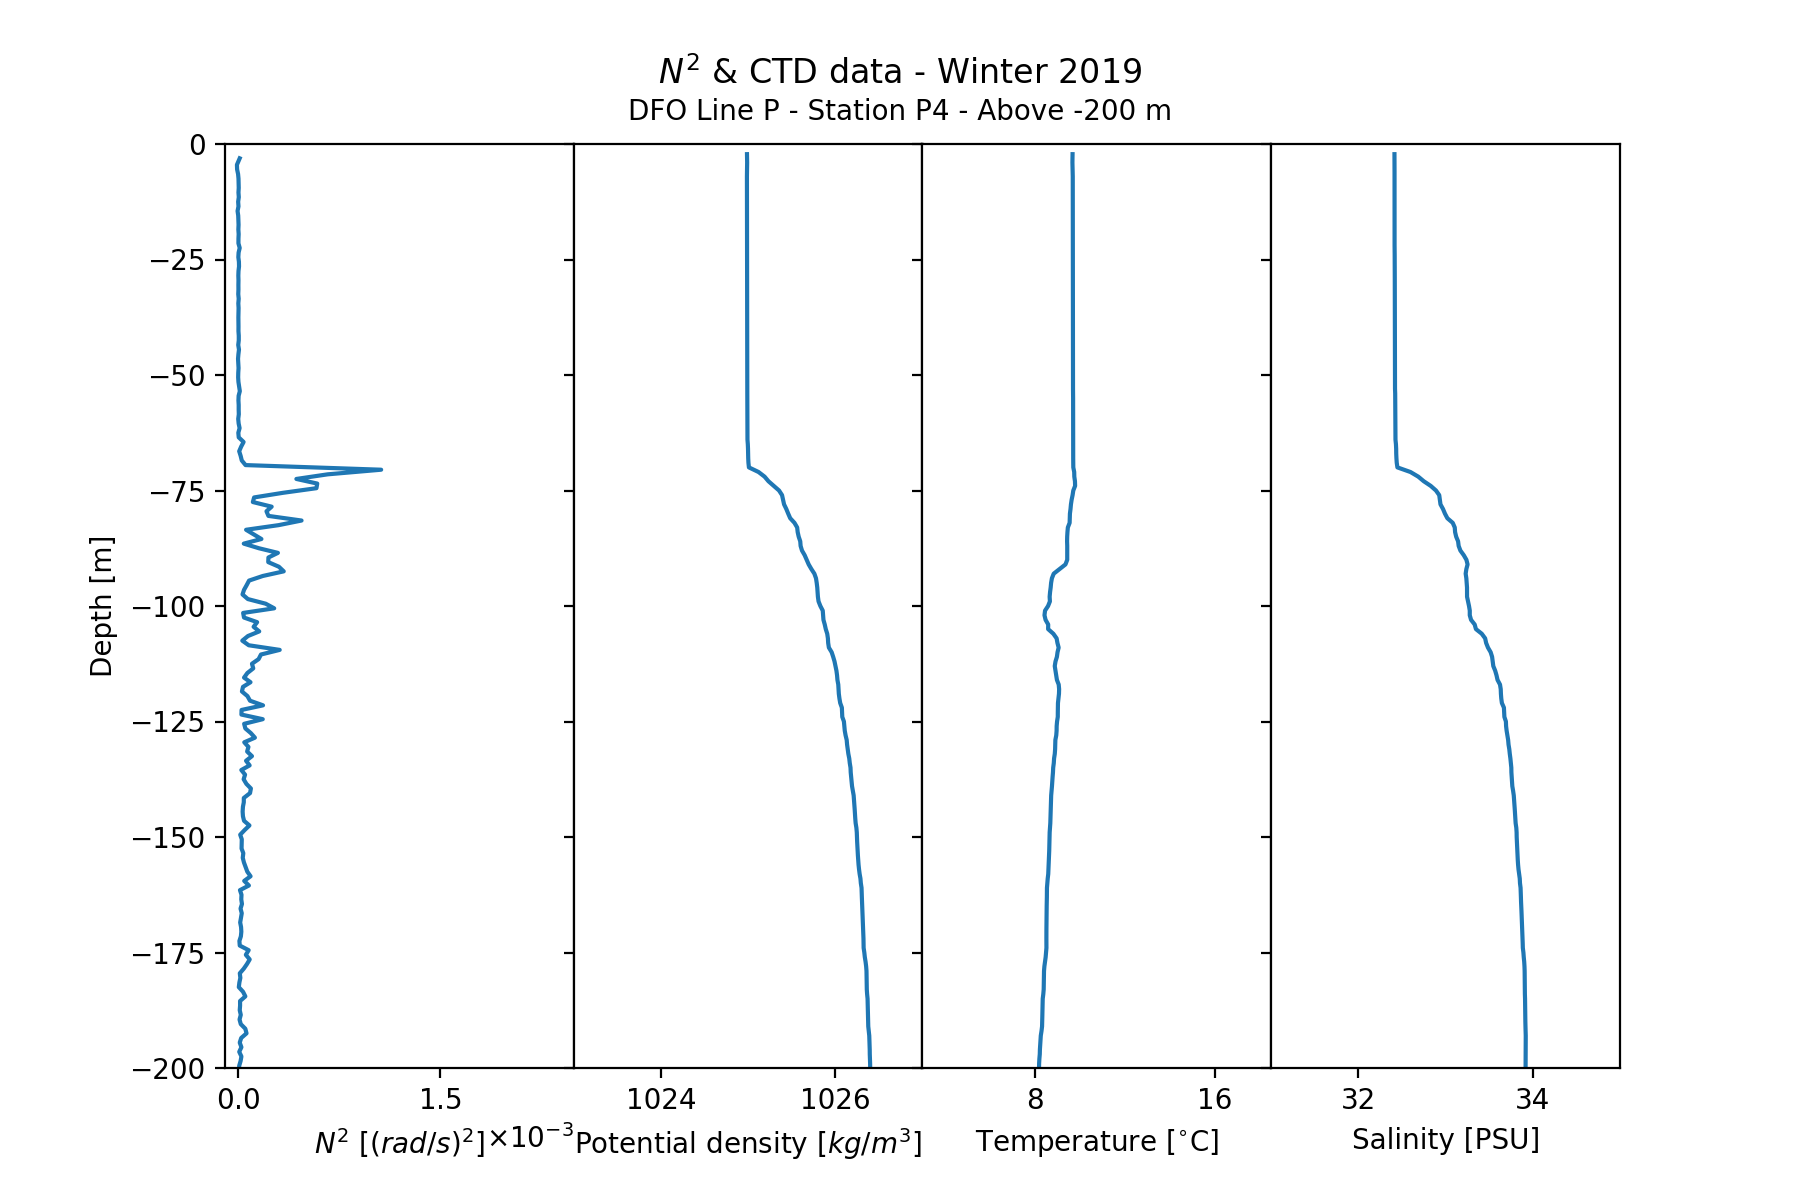

In [386]:
# plot N**2 and density through upper depth

fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(9,6),sharey=True)
fig.subplots_adjust(wspace=0.0)
ax0.plot(N2,-N2P)
ax0.set_ylabel('Depth [m]')
ax0.set_xlabel('$N^2$ [$(rad/s)^2$]')
ax0.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)
ax0.set_xlim(-1e-4,2.5e-3)
ax0.xaxis.set_major_locator(plt.MaxNLocator(2))
ax1.plot(rho,-P)
ax1.set_xlabel('Potential density [$kg/m^3$]')
ax1.set_ylim(-200,0)
ax1.set_xlim(1023,1027)
ax1.xaxis.set_major_locator(plt.MaxNLocator(2))
ax2.plot(T,-P)
ax2.set_xlabel('Temperature [$^{\circ}$C]')
ax2.set_xlim(3,18.5)
ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax3.plot(S,-P)
ax3.set_xlabel('Salinity [PSU]')
ax3.set_xlim(31,35)
ax3.xaxis.set_major_locator(plt.MaxNLocator(2))
fig.text(0.5, 0.93, f'$N^2$ & CTD data - {season} {year}', ha='center', fontsize=12)
fig.text(0.5, 0.9, 'DFO Line P - Station P4 - Above -200 m', ha='center', fontsize=10)


plt.show()

plt.savefig(fname=f'./N2_plots/N2_upper_{season}_'+year+'.pdf',format='pdf')

<IPython.core.display.Javascript object>


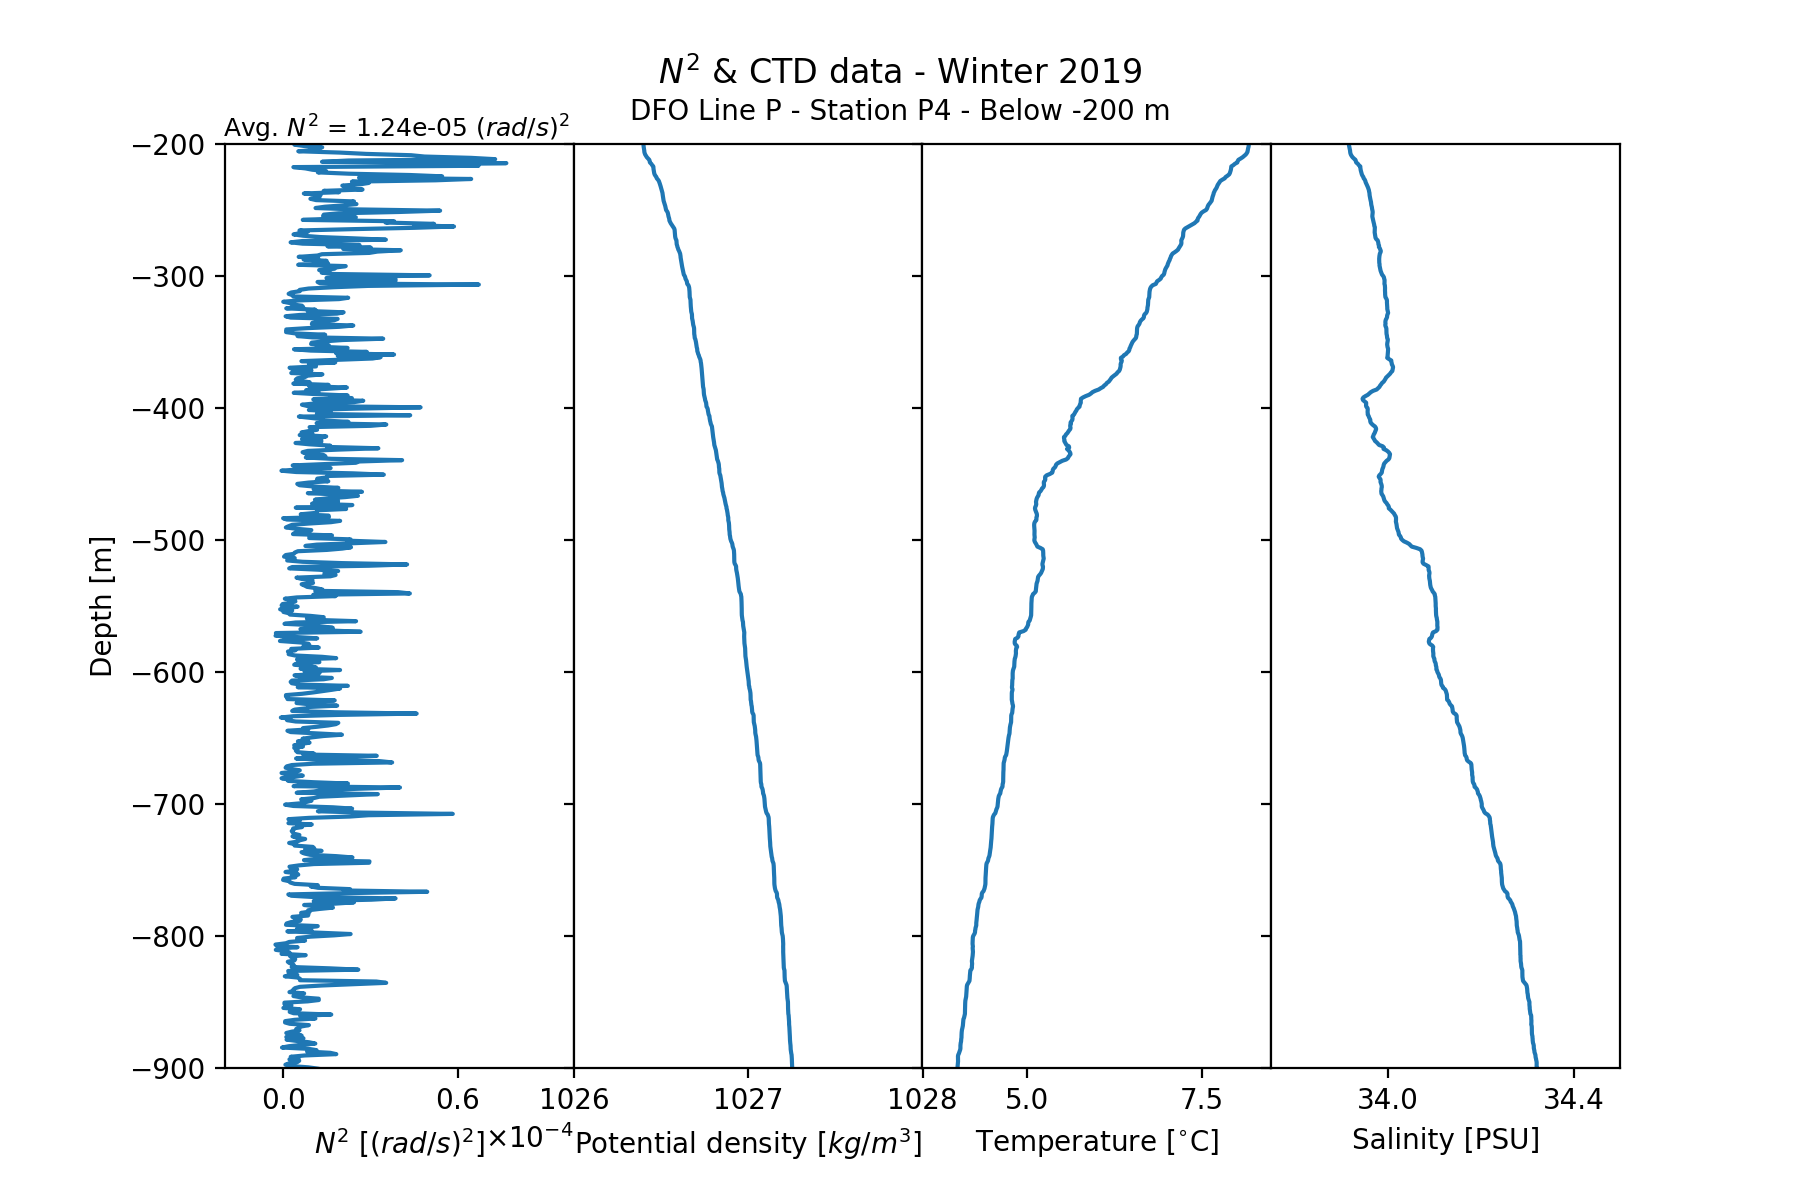

In [387]:
# plot N**2 and density through lower depth

fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(9,6),sharey=True)
fig.subplots_adjust(wspace=0.0)
ax0.plot(N2,-N2P)
ax0.set_ylabel('Depth [m]')
ax0.set_xlabel('$N^2$ [$(rad/s)^2$]')
ax0.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)
ax0.set_xlim(-2e-5,1e-4)
ax0.xaxis.set_major_locator(plt.MaxNLocator(2))
ax1.plot(rho,-P)
ax1.set_xlabel('Potential density [$kg/m^3$]')
ax1.set_ylim(-900,-200)
ax1.set_xlim(1026,1028)
ax1.xaxis.set_major_locator(plt.MaxNLocator(2))
ax2.plot(T,-P)
ax2.set_xlabel('Temperature [$^{\circ}$C]')
ax2.set_xlim(3.5,8.5)
ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax3.plot(S,-P)
ax3.set_xlabel('Salinity [PSU]')
ax3.set_xlim(33.75,34.5)
ax3.xaxis.set_major_locator(plt.MaxNLocator(2))
fig.text(0.5, 0.93, f'$N^2$ & CTD data - {season} {year}', ha='center', fontsize=12)
fig.text(0.5, 0.9, 'DFO Line P - Station P4 - Below -200 m', ha='center', fontsize=10)
fig.text(0.22, 0.885, f'Avg. $N^2$ = {N2_avg:1.2e} $(rad/s)^2$', ha='center', fontsize=9)

plt.show()

plt.savefig(fname=f'./N2_plots/N2_lower_{season}_'+year+'.pdf',format='pdf')